In [1]:
import numpy as np
import math
import scipy.special as sc
import copy

In [2]:
def ShadowedRicianDistribution(b, m, Omega, x):
    lambda_0 = 1/(2*b)
    alpha = (2*b*m)/(2*b*m + Omega)
    beta = Omega/(2*b*(2*b*m + Omega))
    
    # Theoretical PDF
    f = np.zeros(len(x))
    for k in range(len(x)):
        f[k] = (alpha**m)*lambda_0*math.exp(-x[k]*lambda_0)*sc.hyp1f1(m, 1, beta*x[k])
    
    # Theoretical CDF
    F = np.zeros(len(x))
    betabylambda = (beta/lambda_0)
    
    for p in range(len(x)):
        sumk = np.zeros(150)
        
        for n in range(len(sumk)):
            sumk[n] = (sc.poch(m, n) / math.factorial(n) / math.gamma(n+1))*(betabylambda**n)*sc.gammainc(n+1, lambda_0*x[p])
            
        F[p] = np.sum(sumk)
        F[p] *= (alpha)**m 
        
    return f, F

In [3]:
# def Kummer(a, b, z, maxit):
#     """
#     This function implements 1F1(.;.;.), Confluent Hypergeometric function.
    
#     INPUTS:
#         a = Scalar and complex
#         b = Scalar and complex
#         z = Scalar and complex
#         maxit = Scalar and real number specifying maximum number of iteration.
#         Default, maxit = 5
        
#     Output:
#         y = Scalar and complex
    
#     """
    
#     # Checking Input Arguments ...
    
#     # Implementation
#     ytemp = 1
#     for k in range(maxit):
#         ytemp = ytemp + sc.poch(a, k) / (sc.poch(b, k) * math.factorial(k))*z**k
        
#     return ytemp
    
# # def PochhammerSymbol(x, n):
# #     if n == 0:
# #         y = 1
# #     else
# #         for i in range(n):
# #             y *= (x + k - 1)
            
# import scipy.special as sc
# # sc.poch(2,4) # PochhammerSymbol
# sc.gammainc(0.5, [0, 1, 10, 100])

In [4]:
import random


def ShadowedRicianRandGen(b, m, Omega, N, a):
    """
    Stochastic algorithms：Monte Carlo methods.
    
    Reference: https://stackoverflow.com/questions/25471457/generating-random-numbers-with-a-given-probability-density-function
    
    This function generates random number according to shadowed Rician
    density function.

    INPUTS:
           b = Scalar (real), Average power of multipath component
           m = Scalar (real), Fading severity parameter
           Omega = Scalar (real), Average power of LOS component
           N = Scalar (real) specifying number of random number to be 
                   generated
    OUTPUTS:
           X = Scalar (Column Vector if N > 1) specifying random number
               generated using Shadowed Rician distribution function
    """
    # Implementation Starts Here
    X = np.zeros(N)
    
    # Intermediate Variables
    alpha = ((2*b*m)/(2*b*m + Omega))
    beta = Omega/(2*b*(2*b*m + Omega))
    lambda_0 = 1/(2*b)
    
    # Maximum value of Shadowed Rician value occurs at x = 0
    maxfx = (alpha**m) * lambda_0
    c = maxfx
    # Accept and Reject Algo.
    for i in range(N):
        accept = False
        while accept == False:
            U2 = random.uniform(0, c)
            U1 = random.uniform(0, a)

            fx = (alpha**m)*lambda_0*math.exp(-U1*lambda_0)*sc.hyp1f1(m, 1, beta*U1)

            if U2 <= fx:
                X[i] = U1
                accept = True
    return X

In [5]:
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
def EstimateDistribution(X, x):
    """
    % This function implements estimation of CDF and PDF of one dimensional 
    % random variables.
    %
    % INPUTS:
    %           X = vector specifying random variables
    %           x = vector specifying points for which CDF and PDF has to be
    %               evaluated
    % OUTPUTS:
    %           f = vector specifying estimated PDF of random variable X for
    %               points.
    %           F = vector specifying estimated CDF of random variable X for
    %               points.
    """
    
    # Implementation Starts Here
    f = np.zeros(len(x))
    F = np.zeros(len(x))
    h = 0.000000001
    
    # Estimating CDF by its definition
    for m in range(len(x)):
        p = 0
        q = 0
        for n in range(len(x)):
            if X[n] <= x[m]:
                p = p + 1
            else:
                q = q + 1

        F[m] = p / (p + q)
        
    # Estimating PDF by differentiation of CDF
    fx = interp1d(x, F, kind='cubic')
    for k in range(1, len(x)-1):
        fxph = fx(x[k] + h)
        fxmh = fx(x[k] - h)
        f[k] = (fxph - fxmh) / (2*h)
    f = savgol_filter(f, 41, 4)
    return f, F


In [6]:
# # Parameters
# N = int(1e4)
# b = 0.279
# m = 2
# Omega = 0.251
# a = 10

# Generate Shadowed Rician Random Number
X = ShadowedRicianRandGen(b,m,Omega,N, a)

NameError: name 'b' is not defined

Text(0, 0.5, 'Simulated PDF & CDF')

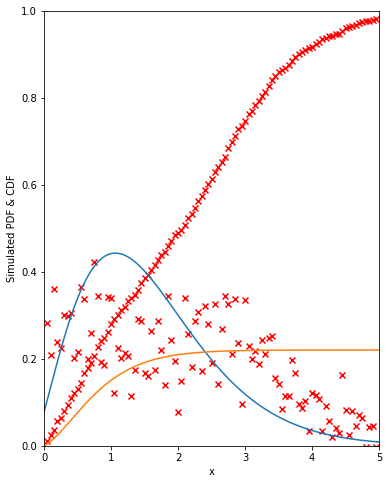

In [7]:
import matplotlib.pyplot as plt

# Parameters
N = int(1e4)
b = 0.158
m = 19.4
Omega = 1.29
a = 10

X = ShadowedRicianRandGen(b,m,Omega,N,a)
# Points for which CDF and PDF are to be evaluated
x = np.linspace(0,5,1000)
# Estimate PDF and CDF
fsim, Fsim = EstimateDistribution(X,x)
# Theoretical PDF & CDF
fana, Fana = ShadowedRicianDistribution(b,m,Omega,x)
# Plot Results
plt.figure(figsize=(6, 8))
plt.plot(x, fana)
plt.plot(x, Fana)
plt.scatter(x[10::10], fsim[10::10], marker='x', color='r')
plt.scatter(x[10::10], Fsim[10::10], marker='x', color='r')
plt.xlim(0,5)
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel('Simulated PDF & CDF')
# str1 = strcat('PDF;','Area = ',num2str(trapz(x,f)))
# legend(str1,'CDF','Location','northwest')


In [ ]:
N = 1
X = ShadowedRicianRandGen(b,m,Omega,N,a)
X